
A) classification model like SVM,RF,DT, etc (any 2)


In [104]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
import pandas as pd
import re
from bs4 import BeautifulSoup
from textblob import TextBlob
from textblob import Word


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [105]:
df=pd.read_csv('/content/tweet_airline _sentiment.csv')

In [106]:
df.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.700000e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24-02-2015 11:35,NaN,Eastern Time (US & Canada)
1,5.700000e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
2,5.700000e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24-02-2015 11:15,Lets Play,Central Time (US & Canada)
3,5.700000e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
4,5.700000e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24-02-2015 11:14,NaN,Pacific Time (US & Canada)
5,5.700000e+17,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,24-02-2015 11:14,NaN,Pacific Time (US & Canada)
6,5.700000e+17,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,24-02-2015 11:13,San Francisco CA,Pacific Time (US & Canada)
7,5.700000e+17,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,24-02-2015 11:12,Los Angeles,Pacific Time (US & Canada)
8,5.700000e+17,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,24-02-2015 11:11,San Diego,Pacific Time (US & Canada)
9,5.700000e+17,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,24-02-2015 10:53,Los Angeles,Eastern Time (US & Canada)


In [107]:
print(df.describe())

           tweet_id  airline_sentiment_confidence  negativereason_confidence  \
count  4.519000e+03                   4519.000000                3368.000000   
mean   5.691569e+17                      0.897374                   0.619998   
std    7.916903e+14                      0.164695                   0.329156   
min    5.680000e+17                      0.335000                   0.000000   
25%    5.690000e+17                      0.689450                   0.355600   
50%    5.690000e+17                      1.000000                   0.667200   
75%    5.700000e+17                      1.000000                   1.000000   
max    5.700000e+17                      1.000000                   1.000000   

       retweet_count  
count    4519.000000  
mean        0.100465  
std         0.365145  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         7.000000  


In [108]:
print(df.shape)

(4519, 15)


In [109]:
print(df['text'].value_counts())

@united thanks                                                                                                                             6
@united thank you!                                                                                                                         4
@united thank you                                                                                                                          3
@united Thanks!                                                                                                                            3
@united thank you.                                                                                                                         2
                                                                                                                                          ..
@united Well I can tell you that your customer service at RDU airport is horrific but is exception at O'Hare in Chicago.                   1
@united sitti

In [110]:
df.isnull().sum().sort_values(ascending=False).head()

negativereason_gold       4512
airline_sentiment_gold    4511
tweet_coord               4142
negativereason            1597
user_timezone             1494
dtype: int64

In [111]:
import matplotlib.pyplot as plt

Text normalization

In [112]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

Removing html strips and noise text



In [113]:
# Define function to remove HTML tags
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    cleaned_text = soup.get_text()
    return cleaned_text

# Define function to remove noise text
def remove_noise_text(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)

    # Remove usernames
    text = re.sub(r"@[^\s]+", "", text)

    # Remove special characters and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)

    # Remove extra whitespaces
    text = re.sub(r"\s+", " ", text)

    return text

# Apply the functions to clean the text data
df['text'] = df['text'].apply(remove_html_tags)
df['text'] = df['text'].apply(remove_noise_text)

<ipython-input-113-6108b141ddbd>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


Text stemming

In [114]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize

# Create an instance of PorterStemmer
stemmer = PorterStemmer()

# Function to perform stemming on a sentence
def stem_sentence(sentence):
    # Tokenize the sentence into individual words
    words = word_tokenize(sentence)
    
    # Perform stemming on each word
    stemmed_words = [stemmer.stem(word) for word in words]
    
    # Join the stemmed words back into a sentence
    stemmed_sentence = ' '.join(stemmed_words)
    
    return stemmed_sentence

# Apply stemming to the 'text' column
df['stemmed_text'] = df['text'].apply(stem_sentence)

# Print the resulting DataFrame
print(df['stemmed_text'])

0                                               what said
1                plu youv ad commerci to the experi tacki
2       i didnt today must mean i need to take anoth trip
3       it realli aggress to blast obnoxi entertain in...
4                  and it a realli big bad thing about it
                              ...                        
4514    you should have assign seat becaus now my cous...
4515    wifi stay connect about the lifetim of a higg ...
4516    forget wed fair how about discount for nonprof...
4517    when will your phone agent be abl to give the ...
4518               make me miss thebachelor right now wah
Name: stemmed_text, Length: 4519, dtype: object


In [115]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review colu
df['text']=df['text'].apply(remove_stopwords)

{'ve', 'wasn', "weren't", 'its', "you're", 'shan', 'what', "mustn't", 'there', 'weren', 'other', 'or', 'before', "shouldn't", 'hasn', 'do', 'yourself', 'can', 'same', 'does', 'him', 'as', 'off', "mightn't", 'on', 'll', 'couldn', 'hers', 'some', 'to', 'had', 'with', 'during', 'isn', 'y', "isn't", 'an', 's', 're', 'because', 'all', 'own', 'by', "doesn't", "should've", 'were', 'be', 'up', "wasn't", "don't", 'their', 'o', 'my', 'yours', 'but', 'too', 'ourselves', 'then', 'so', 'and', 'won', "aren't", 'having', 'here', 'these', 'am', 'no', 'herself', 'which', 'doing', 'how', 'whom', "she's", 'did', 'her', 'until', 'out', 'about', 'we', 'myself', 'it', 'when', 'mightn', 'only', 'those', "won't", 'a', 'theirs', 'being', 'into', 'they', 'if', "it's", "you'd", 'his', 'after', 'is', "that'll", 'shouldn', 'himself', 'while', 'your', 'such', "shan't", 'me', 'ain', "wouldn't", 'are', 't', 'for', 'between', 'don', 'who', 'have', 'themselves', 'against', 'just', 'our', 'under', 'now', 'again', 'will'

In [116]:
df.drop_duplicates("text", inplace=True)

In [117]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# Clean and normalize the text
df['text'] = df['text'].str.lower()  # Convert text to lowercase
df['text'] = df['text'].apply(lambda x: re.sub(r'\d+', '', x))  # Remove numbers
df['text'] = df['text'].apply(lambda x: re.sub(r'\s+', ' ', x))  # Remove extra whitespaces
df['text'] = df['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))  # Remove punctuation

# Tokenize the text
stopwords_list = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: word_tokenize(x))  # Tokenize the text
df['text'] = df['text'].apply(lambda x: [word for word in x if word not in stopwords_list])  # Remove stopwords

# Join the tokenized words back into a normalized sentence
df['text'] = df['text'].apply(lambda x: ' '.join(x))

In [118]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
def remove_punctuation(text):
    # Remove punctuation marks from the text
    text = text.translate(str.maketrans("", "", string.punctuation))
    return text

def remove_stopwords(text):
    # Tokenize the text into individual words
    tokens = word_tokenize(text)

    # Remove stopwords
    stopwords_list = set(stopwords.words("english"))
    filtered_tokens = [word for word in tokens if word.lower() not in stopwords_list]

    # Join the filtered tokens back into a single text string
    filtered_text = " ".join(filtered_tokens)
    return filtered_text

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()

    # Tokenize the text into individual words
    tokens = word_tokenize(text)

    # Lemmatize the tokens
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join the lemmatized tokens back into a single text string
    lemmatized_text = " ".join(lemmatized_tokens)
    return lemmatized_text

def normalize_text(text):
    # Remove punctuation
    text = remove_punctuation(text)

    # Remove stopwords
    text = remove_stopwords(text)

    # Lemmatize the text
    text = lemmatize_text(text)

    return text
df['clean_text'] = df['text'].apply(normalize_text)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [119]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit the CountVectorizer to the text data and transform it into a numerical feature matrix
X = vectorizer.fit_transform(df['text'])

# Convert the feature matrix into a DataFrame
df_bow = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Print the resulting DataFrame
print(df_bow)


      aa  aaaand  aaba  aaron  ab  aback  abbreve  abc  abcdef  ability  ...  \
0      0       0     0      0   0      0        0    0       0        0  ...   
1      0       0     0      0   0      0        0    0       0        0  ...   
2      0       0     0      0   0      0        0    0       0        0  ...   
3      0       0     0      0   0      0        0    0       0        0  ...   
4      0       0     0      0   0      0        0    0       0        0  ...   
...   ..     ...   ...    ...  ..    ...      ...  ...     ...      ...  ...   
4441   0       0     0      0   0      0        0    0       0        0  ...   
4442   0       0     0      0   0      0        0    0       0        0  ...   
4443   0       0     0      0   0      0        0    0       0        0  ...   
4444   0       0     0      0   0      0        0    0       0        0  ...   
4445   0       0     0      0   0      0        0    0       0        0  ...   

      yyzua  zabsonre  zambia  zccu  ze

In [120]:
# Calculate the length of each text in the 'text' column
df['text_len'] = df['text'].apply(lambda x: len(x))

# Print the updated DataFrame
print(df['text_len'])

0        4
1       45
2       44
3       76
4       20
        ..
4514    73
4515    41
4516    76
4517    79
4518    33
Name: text_len, Length: 4446, dtype: int64


In [121]:
df = df[df['text_len'] > 3]
df = df[df['text_len'] < 100]

In [122]:
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,stemmed_text,clean_text,text_len
0,5.700000e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,said,NaN,24-02-2015 11:35,NaN,Eastern Time (US & Canada),what said,said,4
1,5.700000e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,plus youve added commercials experience tacky,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada),plu youv ad commerci to the experi tacki,plus youve added commercial experience tacky,45
2,5.700000e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,didnt today must mean need take another trip,NaN,24-02-2015 11:15,Lets Play,Central Time (US & Canada),i didnt today must mean i need to take anoth trip,didnt today must mean need take another trip,44
3,5.700000e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,really aggressive blast obnoxious entertainmen...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada),it realli aggress to blast obnoxi entertain in...,really aggressive blast obnoxious entertainmen...,76
4,5.700000e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,really big bad thing,NaN,24-02-2015 11:14,NaN,Pacific Time (US & Canada),and it a realli big bad thing about it,really big bad thing,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4514,5.700000e+17,neutral,0.3569,NaN,0.0000,Southwest,NaN,LaRoseKayla,NaN,1,assigned seating cousin probably cant sit toge...,NaN,23-02-2015 21:13,NaN,NaN,you should have assign seat becaus now my cous...,assigned seating cousin probably cant sit toge...,73
4515,5.700000e+17,negative,1.0000,Bad Flight,0.6565,Southwest,NaN,___the___,NaN,0,wifi stays connected lifetime higgs boson,NaN,23-02-2015 21:08,la,Pacific Time (US & Canada),wifi stay connect about the lifetim of a higg ...,wifi stay connected lifetime higgs boson,41
4516,5.700000e+17,neutral,1.0000,NaN,NaN,Southwest,NaN,lcpnn,NaN,0,forget wedding fairs discounts nonprofits dona...,NaN,23-02-2015 20:53,California,Alaska,forget wed fair how about discount for nonprof...,forget wedding fair discount nonprofit donate ...,76
4517,5.700000e+17,negative,0.6703,Customer Service Issue,0.6703,Southwest,NaN,TravelDean,NaN,0,phone agents able give correct departure times...,NaN,23-02-2015 20:23,NaN,NaN,when will your phone agent be abl to give the ...,phone agent able give correct departure time c...,79


In [123]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt #to display our wordcloud
from PIL import Image #to load our image
import numpy as np #to get the color of our image

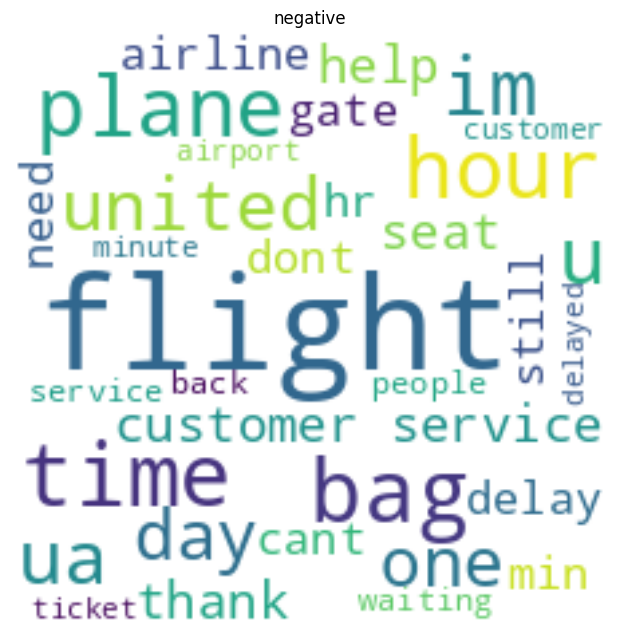

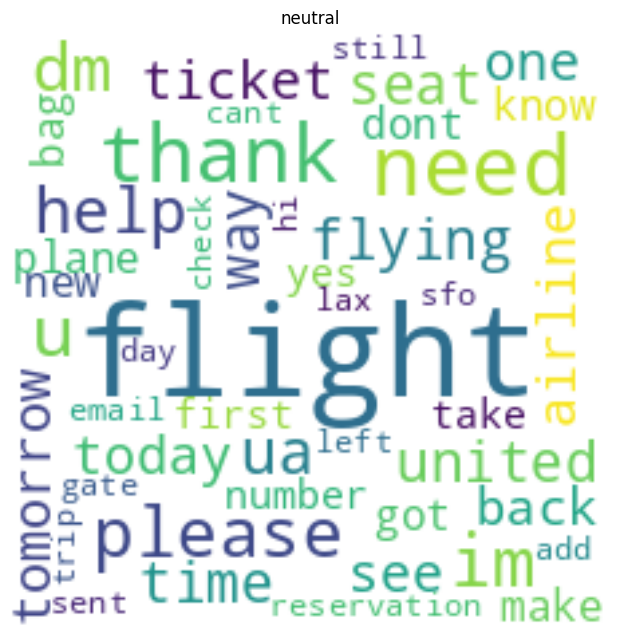

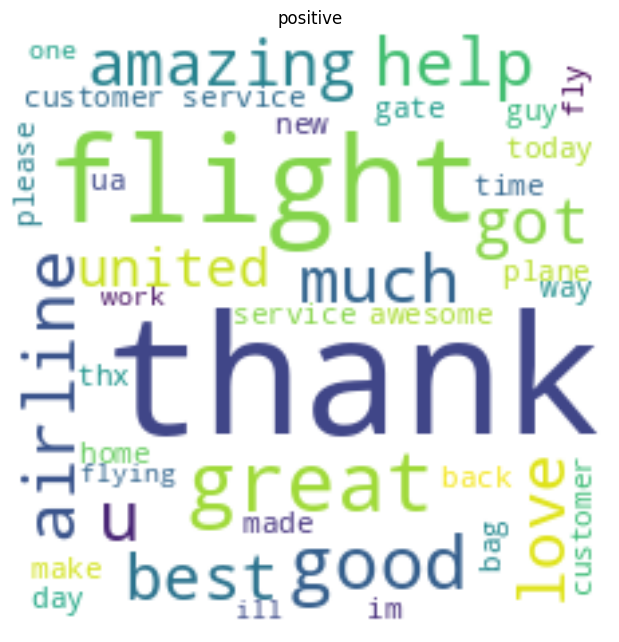

In [128]:
from PIL import Image
from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder
lenc = LabelEncoder()

# Encode the 'airline_sentiment' column
encoded_labels = lenc.fit_transform(df['airline_sentiment'])

# Retrieve the unique classes
classes = lenc.classes_

for c in range(len(classes)):
    string = ""
    for i in df[encoded_labels == c]['text'].values:
        string = string + " " + i.strip()

    custom_mask = np.array(Image.open(r"/content/twet.png")) 
    wordcloud = WordCloud(width=600, height=600, background_color='white', mask=custom_mask, min_font_size=10).generate(string)
 
    # Plot the WordCloud image                      
    plt.figure(figsize=(6, 6), facecolor=None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title(classes[c])
    plt.savefig("twitter.png", format="png")
    plt.show()
    del string

In [129]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

tfidf = TfidfTransformer()
clf = CountVectorizer()
X_cv =  clf.fit_transform(df['text'])
tf_transformer = TfidfTransformer(use_idf=True).fit(X_cv)
X_tf = tf_transformer.transform(X_cv)

In [130]:
X_tf

<4274x6255 sparse matrix of type '<class 'numpy.float64'>'
	with 36953 stored elements in Compressed Sparse Row format>

In [131]:
from sklearn.model_selection import train_test_split
# train and test
X_train, X_test, y_train, y_test = train_test_split(X_tf, df['airline_sentiment'], test_size=0.2, stratify=df['airline_sentiment'], random_state=42)

In [132]:
y_train.value_counts()

negative    2225
neutral      697
positive     497
Name: airline_sentiment, dtype: int64

In [150]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
classifier_rf = RandomForestClassifier(n_estimators=100, random_state=1)

# Fit the classifier to the training data
classifier_rf.fit(X_train, y_train)

# Make predictions on the testing data
pred_rf = classifier_rf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy_rf = accuracy_score(y_test, pred_rf)
print("Accuracy:", accuracy_rf)

# Generate classification report
report = classification_report(y_test, pred_rf)
print("Classification Report:\n", report)


Accuracy: 0.735672514619883
Classification Report:
               precision    recall  f1-score   support

    negative       0.74      0.97      0.84       556
     neutral       0.66      0.19      0.29       175
    positive       0.77      0.45      0.57       124

    accuracy                           0.74       855
   macro avg       0.72      0.54      0.57       855
weighted avg       0.73      0.74      0.69       855



In [153]:
# Calculate the accuracy
accuracy_rf= accuracy_score(y_test, pred_rf)
# Print the accuracy
print("Accuracy:", accuracy_rf)

Accuracy: 0.735672514619883


In [151]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_mln = nb_clf.predict(X_test.toarray())  # Convert sparse matrix to dense array using toarray()
print('Classification Report for Naive Bayes:\n', classification_report(y_test, y_pred_mln, target_names=airline_sentiment))


Classification Report for Naive Bayes:
               precision    recall  f1-score   support

    Positive       0.66      1.00      0.79       556
     Neutral       0.75      0.03      0.07       175
    Negative       1.00      0.03      0.06       124

    accuracy                           0.66       855
   macro avg       0.80      0.35      0.31       855
weighted avg       0.73      0.66      0.54       855



In [154]:
# Calculate the accuracy
accuracy_mln = accuracy_score(y_test, y_pred_mln)
# Print the accuracy
print("Accuracy:", accuracy_mln)

Accuracy: 0.6608187134502924


In [156]:
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report

# Create an SVM classifier
svm_clf = svm.SVC()

# Fit the classifier to the training data
svm_clf.fit(X_train, y_train)

# Make predictions on the testing data
pred_svm = svm_clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy_svm = accuracy_score(y_test, pred_svm)
print("Accuracy:", accuracy_svm)

# Generate classification report
report = classification_report(y_test, pred_svm)
print("Classification Report:\n", report)


Accuracy: 0.704093567251462
Classification Report:
               precision    recall  f1-score   support

    negative       0.70      0.99      0.82       556
     neutral       0.67      0.09      0.16       175
    positive       0.81      0.31      0.44       124

    accuracy                           0.70       855
   macro avg       0.72      0.46      0.47       855
weighted avg       0.71      0.70      0.63       855



In [157]:
# Calculate the accuracy
accuracy_svm = accuracy_score(y_test, svm_pred)
# Print the accuracy
print("Accuracy:", accuracy_svm)

Accuracy: 0.704093567251462


In [158]:
from sklearn.metrics import confusion_matrix 

def print_confusion_matrix(confusion_matrix, class_names, figsize = (5,3), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

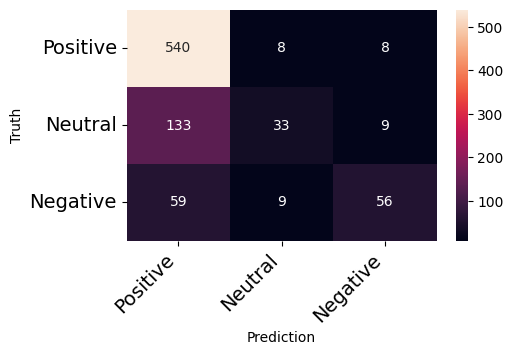

In [160]:
#Random Forest
cm = confusion_matrix(y_test,pred_rf)
print_confusion_matrix(cm,airline_sentiment)

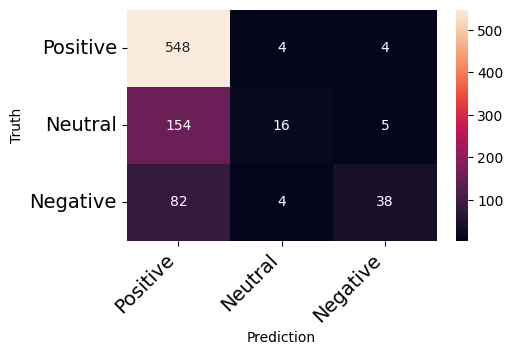

In [162]:
#svm 
cm = confusion_matrix(y_test,svm_pred)
print_confusion_matrix(cm,airline_sentiment)

In [163]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the precision scores for each model
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
precision_mln = precision_score(y_test, y_pred_mln, average='weighted')
precision_svm = precision_score(y_test, svm_pred, average='weighted')


# Calculate the recall scores for each model
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
recall_mln = recall_score(y_test, y_pred_mln, average='weighted')
recall_svm = recall_score(y_test, svm_pred, average='weighted')


f1_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_mln = recall_score(y_test, y_pred_mln, average='weighted')
f1_svm = recall_score(y_test, svm_pred, average='weighted')


In [164]:
Models = pd.DataFrame({
    'Model' : ['Random Forest Classifier', 'Multinomial Naive Bayes Classifier', 'Support Vector Classifier'],
    'Accuracy' : [accuracy_rf * 100, accuracy_mln * 100, accuracy_svm * 100, ],
    'Precision' : [precision_rf * 100, precision_mln * 100, precision_svm * 100, ],
    'Recall' : [recall_rf * 100, recall_mln * 100, recall_svm * 100, ],
    'F1-Score' : [f1_rf * 100, f1_mln * 100, f1_svm * 100]
})
print(Models)

                                Model   Accuracy  Precision     Recall  \
0            Random Forest Classifier  73.567251  72.606693  73.567251   
1  Multinomial Naive Bayes Classifier  66.081871  72.666646  66.081871   
2           Support Vector Classifier  70.409357  70.825104  70.409357   

    F1-Score  
0  73.567251  
1  66.081871  
2  70.409357  


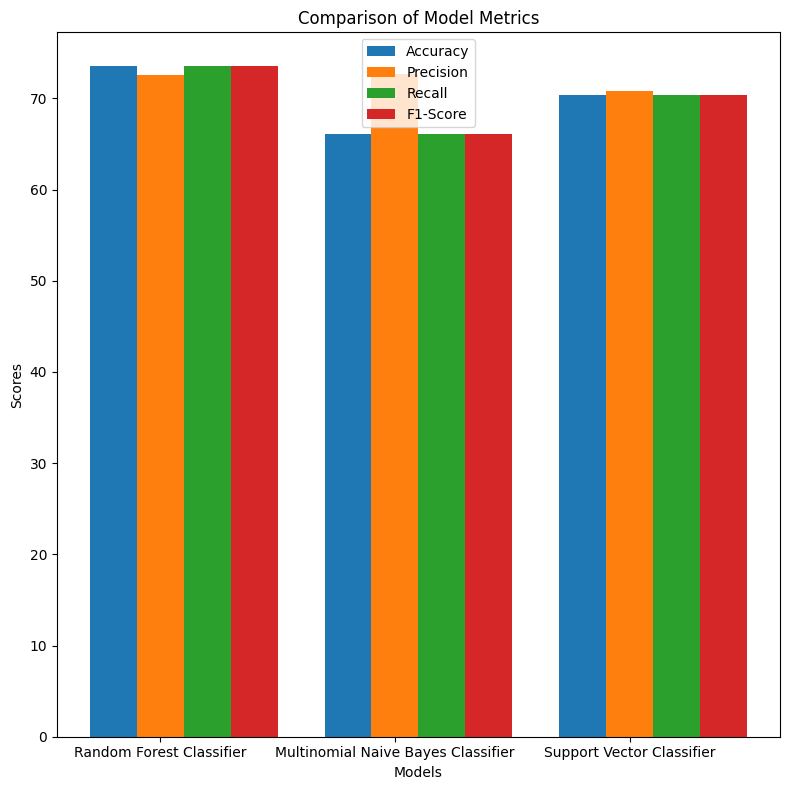

In [165]:
models = Models['Model']
accuracy = [accuracy_rf * 100, accuracy_mln * 100, accuracy_svm * 100]
precision = [precision_rf * 100, precision_mln * 100, precision_svm * 100]
recall = [recall_rf * 100, recall_mln * 100, recall_svm * 100]
f1_score = [f1_rf * 100, f1_mln * 100, f1_svm * 100]

x = np.arange(len(models))
width = 0.2
fig, ax = plt.subplots(figsize=(8, 8))


rects1 = ax.bar(x - width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x, precision, width, label='Precision')
rects3 = ax.bar(x + width, recall, width, label='Recall')
rects4 = ax.bar(x + (2 * width), f1_score, width, label='F1-Score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()
plt.show()


B) BILSTM model-(sequential)


In [148]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [14]:

df = pd.read_csv('/content/emails.csv')
df.head(5)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [17]:
import nltk
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer,PorterStemmer
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
st = PorterStemmer()
lem = WordNetLemmatizer()

def is_alpha(word):
    for part in word.split('-'):
        if not part.isalpha():
            return False
    
    return True

def clean_dataset(text):
    text = re.sub(r'http\S+', '', text) # removing links
    text = re.sub(r'\\n', ' ', text) # removing \\n
    text = re.sub(r"\s*#\S+", "", text) # removing hash tags
    text = re.sub(r"\s*@\S+", "", text) # removing @
    text = text.lower()
    words = [word for word in word_tokenize(text) if is_alpha(word)]
    #words = [st.stem(word) for word in words]
    words = [lem.lemmatize(word) for word in words]
    
    # text = " ".join([word for word in text.split(" ") if is_alpha(word)])
    # text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A) 
    words = [w for w in words if not w in stop_words]
    text = " ".join(words)
    
    return text.strip()

df.insert(len(df.columns)-1, "clean_text", df['text'].apply(clean_dataset))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,clean_text,spam
0,Subject: naturally irresistible your corporate...,subject naturally irresistible corporate ident...,1
1,Subject: the stock trading gunslinger fanny i...,subject stock trading gunslinger fanny merrill...,1
2,Subject: unbelievable new homes made easy im ...,subject unbelievable new home made easy im wan...,1
3,Subject: 4 color printing special request add...,subject color printing special request additio...,1
4,"Subject: do not have money , get software cds ...",subject money get software cd software compati...,1


In [18]:
X = df['clean_text'].values
y = df['spam'].values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [21]:
max_words = 5000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, padding='post', maxlen=max_len)

X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, padding='post', maxlen=max_len)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

In [23]:
vocab_size = len(tokenizer.word_index) + 1

model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_len))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
144/144 [==============================] - 35s 207ms/step - loss: 0.2504 - accuracy: 0.9062 - val_loss: 0.1466 - val_accuracy: 0.9634
Epoch 2/10
144/144 [==============================] - 27s 188ms/step - loss: 0.0535 - accuracy: 0.9865 - val_loss: 0.1120 - val_accuracy: 0.9729
Epoch 3/10
144/144 [==============================] - 28s 194ms/step - loss: 0.0265 - accuracy: 0.9939 - val_loss: 0.0681 - val_accuracy: 0.9799
Epoch 4/10
144/144 [==============================] - 27s 188ms/step - loss: 0.0109 - accuracy: 0.9961 - val_loss: 0.0578 - val_accuracy: 0.9843
Epoch 5/10
144/144 [==============================] - 28s 192ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0629 - val_accuracy: 0.9887
Epoch 6/10
144/144 [==============================] - 33s 229ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0655 - val_accuracy: 0.9878
Epoch 7/10
144/144 [==============================] - 32s 220ms/step - loss: 6.7802e-04 - accuracy: 1.0000 - val_loss: 0.0696 - va

In [25]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

36/36 [==============================] - 1s 33ms/step - loss: 0.0723 - accuracy: 0.9869
Test Loss: 0.07228441536426544
Test Accuracy: 0.9869109988212585


###C) Using Transformer Based BiLSTM

In [38]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.models import Model
from transformers import TFAutoModel, AutoTokenizer
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
from sklearn.preprocessing import LabelEncoder
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [40]:
# Load the CSV file
df = pd.read_csv("/content/Women Dresses Reviews Dataset .csv")
df

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1
1,1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1
2,2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0
3,3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1
4,4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,44,General Petite,Dresses,Dresses,1081,Love it!,I oot this dress in the blue. it fits great--h...,0,5,1
23482,23482,39,General,Dresses,Dresses,1110,Great piece,I was very patient with this dress. i was wait...,1,5,1
23483,23483,29,General Petite,Tops,Knits,862,So soft and flattering,"The deep v doesn't gape, and flatters the neck...",0,5,1
23484,23484,57,General,Dresses,Dresses,1082,Another winner from isabella sinclair,"I saw this dress online this morning, went int...",10,5,1


In [41]:
# Split the data into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df["review_text"], df["review_text"], test_size=0.2, random_state=42
)

In [42]:
# Load the Transformer model and tokenizer
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
transformer_model = TFAutoModel.from_pretrained(model_name)

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_layer_norm', 'vocab_transform', 'vocab_projector', 'activation_13']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [46]:
# Define the text preprocessing function
def preprocess_text(text, tokenizer, max_length):
    # Clean and preprocess the text
    cleaned_text = clean_text(text)
    
    # Tokenize the text
    tokens = tokenizer.encode_plus(
        cleaned_text,
        max_length=max_length,
        truncation=True,
        padding='max_length',
        add_special_tokens=True,
        return_attention_mask=True,
        return_token_type_ids=False,
        return_tensors='tf'
    )
    return tokens['input_ids'][0], tokens['attention_mask'][0]

In [47]:
# Define the clean_text function
def clean_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Remove punctuation and special characters
    tokens = [token for token in tokens if token.isalnum()]
    # Perform stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    # Perform lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Join the tokens back into a string
    cleaned_text = ' '.join(tokens)
    return cleaned_text

In [49]:
# Convert float values in the text column to strings
df['review_text'] = df['review_text'].astype(str)

In [75]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, Attention, Concatenate
from tensorflow.keras.models import Model
from transformers import TFAutoModel

def build_transformer_bilstm_model(max_length, num_classes):
    # Define input layer
    input_layer = Input(shape=(max_length,), dtype=tf.int32)
    
    # Load the transformer model
    transformer_model = TFAutoModel.from_pretrained("bert-base-uncased")
    transformer_output = transformer_model(input_layer)[0]
    
    # Apply bidirectional LSTM
    lstm_layer = Bidirectional(LSTM(64, return_sequences=True))(transformer_output)
    
    # Apply attention mechanism
    attention_layer = Attention()([lstm_layer, lstm_layer])
    
    # Concatenate LSTM output and attention output
    concat_layer = Concatenate()([lstm_layer, attention_layer])
    
    # Output layer
    output_layer = Dense(num_classes, activation='softmax')(concat_layer)
    
    # Build the model
    model = Model(inputs=input_layer, outputs=output_layer)
    
    return model

# Define the maximum sequence length and number of classes
max_length = 128
num_classes = 2  # Replace with the actual number of classes

# Build the model
model = build_transformer_bilstm_model(max_length, num_classes)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [91]:
import numpy as np
from sklearn.model_selection import train_test_split
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [100]:

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the CSV file
dataset= pd.read_csv("/content/emails.csv")

In [102]:
dataset

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [ ]:
sentences = dataset['text'].tolist()
sentiment_labels = dataset['spam'].tolist()

# Define the parameters
max_vocab_size = 10000  # Maximum vocabulary size
max_seq_length = 100  # Maximum sequence length
embedding_dim = 100  # Embedding dimension
lstm_units = 128  # LSTM units
num_classes = 3  # Number of sentiment classes (positive, negative, neutral)

# Tokenize the sentences
tokenizer = Tokenizer(num_words=max_vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(sentences)
padded_sequences = pad_sequences(sequences, maxlen=max_seq_length)


In [ ]:
# Convert sentiment labels to one-hot encoding
sentiment_labels = tf.one_hot(sentiment_labels, depth=num_classes)

# Split the dataset into training and testing sets
split_ratio = 0.8  # 80% for training, 20% for testing
split_index = int(len(padded_sequences) * split_ratio)

train_sequences = padded_sequences[:split_index]
train_labels = sentiment_labels[:split_index]
test_sequences = padded_sequences[split_index:]
test_labels = sentiment_labels[split_index:]

In [ ]:
# Create the model architecture
input_layer = Input(shape=(max_seq_length,))
embedding_layer = Embedding(input_dim=max_vocab_size, output_dim=embedding_dim)(input_layer)
lstm_layer = Bidirectional(LSTM(units=lstm_units, return_sequences=True))(embedding_layer)
transformer_layer = tf.keras.layers.MultiHeadAttention(
    num_heads=4, key_dim=32, dropout=0.3
)(lstm_layer, lstm_layer)
flatten_layer = tf.keras.layers.Flatten()(transformer_layer)
output_layer = Dense(units=num_classes, activation='softmax')(flatten_layer)

model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

In [ ]:
# Compile and train the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_sequences, train_labels, epochs=10, batch_size=32, validation_data=(test_sequences, test_labels))

# Evaluate the model
loss, accuracy = model.evaluate(test_sequences, test_labels, batch_size=32)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding_4 (Embedding)        (None, 100, 100)     1000000     ['input_3[0][0]']                
                                                                                                  
 bidirectional_5 (Bidirectional  (None, 100, 256)    234496      ['embedding_4[0][0]']            
 )                                                                                                
                                                                                                  
 multi_head_attention (MultiHea  (None, 100, 256)    131712      ['bidirectional_5[0][0]',  